# Python pour le Machine Learning : Pandas / Analyse du Titanic


## 1. Intro

Est-ce que vous saviez que vous aviez plus de chances de survivre à bord du Titanic si vous étiez un homme voyageant en troisième classe plutôt qu'un homme voyageant en seconde classe ?

Dans cette leçon de la série Python spécial "machine learning", vous allez apprendre à utiliser pandas, qui est l'outil le plus important à connaître quand on souhaite travailler avec des données. 

Si j'ai mentionné une telle chose, c'est parce qu'avec pandas, vous pouvez réaliser tout ce que vous pourriez imaginer avec des données. 

Vous pouvez charger vos propres données dans Python, puis les manipuler, les nettoyer, les observer et les analyser. 

Vous pouvez prendre deux datasets et les assembler ensemble. Bref, vous pouvez faire tout ce genre de choses, et tout cela grâce à une structure très simple à comprendre : le DataFrame.

## 2. Importer vos données dans Python : pd.read_csv()

Les passagers à bord du navire sont décrits par diverses informations. Parmi celles-ci, on retrouve le sexe, l'âge, et la classe dans laquelle les passagers étaient – que ce soit la première, la deuxième ou la troisième classe. 

On apprend également si le passager a survécu ou non au naufrage du navire.

Une fois le dataset $titanic3.xls$ téléchargé, pour le charger dans Python, il suffit d'importer $pandas$ comme $pd$ - c'est ce qu'on fait en général quand on travaille avec pandas. 

Ensuite, on va utiliser la fonction $\text{read_excel}$ puisque, ici en l'occurrence, il s'agit d'un fichier Excel qui s'appelle $titanic3.xls$. Ceci nous fournit un DataFrame qui contient toutes les données présentes dans notre fichier Excel.

D'ailleurs, on se rend compte qu'un DataFrame ressemble beaucoup à un tableau Excel. En effet, on retrouve en tête du tableau le nom de nos différentes colonnes et également un index pour chaque ligne. 

Donc, vous l'aurez compris, pandas, c'est un peu comme Excel, mais c'est beaucoup plus puissant et bien plus pratique.

## 3. Inspecter un DataFrame : shape, head, columns

Alors, ce DataFrame, nous allons l'enregistrer sous une variable "data". 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_excel('datasets/titanic3.xls')

Je vais maintenant vous faire une petite démonstration des capacités d'analyse de pandas, ce qui me permettra de vous présenter les fonctions suivantes.
![image.png](./images/Python_Pandas_Fig_000001.png)

Pour commencer, nous allons vérifier les dimensions de notre DataFrame en écrivant $data.shape$. C'est un peu comme dans $NumPy$, car en réalité, pandas est construit sur la base de $NumPy$

In [3]:
data.shape

(1309, 14)

Donc, ici en l'occurrence, on voit "1309 lignes". Cela signifie que nous avons 1309 passagers qui sont enregistrés dans notre dataset, et nous avons 14 colonnes qui nous permettent de décrire ces passagers. 

Si nous voulons voir quelles sont ces différentes colonnes, nous pouvons écrire $data.columns$. 

In [4]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

Si nous voulons également voir les premières lignes de notre DataFrame, en général, nous écrivons $data.head()$. C'est une fonction très utile car elle nous permet de jeter un coup d'œil rapide pour voir si notre DataFrame a bien été chargé. 

In [5]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## 4. Éliminer les colonnes inutiles : drop()

Parmi les différentes colonnes, on retrouve le nom du passager. On peut également retrouver son ticket. Est-ce une information utile ? Pas vraiment. Donc, ce que nous allons faire, c'est éliminer certaines de ces colonnes en utilisant la fonction $drop$. 

Donc, nous allons écrire $data = data.drop()$, et entre crochets, nous allons passer le nom des différentes colonnes que nous voulons éliminer. Par exemple, la colonne "name", la colonne "ticket", etc. 

In [6]:
 data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

Au final, j'ai éliminé presque toutes les colonnes pour ne garder que le sexe, l'âge, la classe du passager, et le fait qu'il ait survécu ou non au naufrage du navire. Donc, nous voulons éliminer tout cela en suivant l'axe 1 de notre DataFrame. 
![image.png](./images/Python_Pandas_Fig_000003.png)

Encore une fois, cela fonctionne comme dans NumPy. Donc, après avoir exécuté cette cellule de code, nous réutilisons la fonction head() pour afficher le début de notre nouveau DataFrame, qui est plus concis et contient moins d'informations. Cependant, ces informations seront plus utiles pour notre analyse.

In [7]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


## 5. Statistiques rapides : describe()

Nous allons commencer par utiliser une fonction très utile : la fonction $describe()$. Cette fonction nous fournit les statistiques de base pour chacune de nos colonnes. Par exemple, nous pouvons voir que la moyenne d'âge à bord du Titanic était de 29 ans. Nous constatons que la personne la plus jeune avait moins d'un an, tandis que la personne la plus âgée avait 80 ans. Nous pouvons aussi observer que seulement 38% des passagers ont survécu. Et ici, nous pouvons vraiment parler de pourcentage, car dans notre colonne "survived", nous n'avons que des 0 et des 1. 

In [8]:
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


Donc, si nous en faisons la moyenne, cela nous donne une proportion. Cependant, il y a quelque chose d'autre qui doit attirer votre attention dans ce tableau. Nous pouvons voir que dans la colonne "class" et la colonne "survived", nous avons 1309 lignes, ce qui est très bien. Par contre, dans la colonne "age", nous n'avons que 1046 lignes. 

## 6. Les données manquantes dans Pandas : fillna(), dropna()

Il nous manque des données concernant l'âge de certains passagers. Peut-être que ces données n'avaient pas été enregistrées ou qu'elles ont été perdues. La raison importe peu. Tout ce que nous savons, c'est qu'il nous manque des données, et lorsqu'il nous manque des données, il est difficile d'effectuer une analyse. 

Dans ces situations, nous avons deux options. 
![image.png](./images/Python_Pandas_Fig_000004.png)
![image.png](./images/Python_Pandas_Fig_000005.png)

<ol>
    <li>La première est d'utiliser la fonction $fillna$ pour remplacer les données manquantes par une valeur par défaut. Par exemple, nous pourrions décider que lorsque l'âge manque, nous le remplacerons simplement par l'âge moyen. Cela peut être une option judicieuse, mais il faut garder à l'esprit que cela pourrait fausser notre dataset. Peut-être que ce passager n'avait pas 30 ans. En réalité, nous ne savons pas.</li>     
    <li>La deuxième option est d'éliminer les lignes où il nous manque des données. C'est regrettable car cela réduit la taille de notre dataset, mais parfois il vaut mieux perdre quelques données plutôt que de fausser la réalité des faits.</li> 
</ol>    
Pour éliminer ces lignes, nous utilisons la fonction $dropna()$. Donc, nous écrivons $data = data.dropna()$, et à l'intérieur, nous spécifions l'axe sur lequel nous souhaitons éliminer les données. Dans ce cas, nous voulons éliminer des lignes, donc nous travaillons sur l'axe 0.    


In [9]:
data = data.dropna(axis=0)
data.shape

(1046, 4)

Après avoir exécuté cette cellule de code, nous observons que les dimensions de notre DataFrame sont désormais de 1046 lignes par 4 colonnes. Nous sommes donc passés de 1309 passagers à 1046 passagers. 

Cela modifie évidemment les statistiques dans notre colonne "survived" puisque désormais, en moyenne, 40% des passagers ont survécu. Il est essentiel de se rappeler que ce sont 40% des passagers parmi les 1046 passagers que nous avons analysés.

In [10]:
data.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


## 7. Value_counts et graphiques matplotlib !

À présent, j'aimerais savoir, parmi ces 1046 passagers, le nombre de personnes qui étaient en première, deuxième ou troisième classe. Pour cela, nous allons utiliser une fonction très utile : la fonction $value_counts$. 

Donc, je vais sélectionner ma colonne qui contient les classes des passagers, puis je vais écrire $value_counts$. Ceci nous donne le nombre de personnes en troisième classe, le nombre en première classe et le nombre en deuxième classe.

In [11]:
data['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

Avec ces données, il est maintenant temps de créer notre premier graphique. Pour ce faire, c'est très simple : il suffit d'écrire $.plot()$, suivi de $bar$ si l'on souhaite créer un graphique en barres. 

<Axes: >

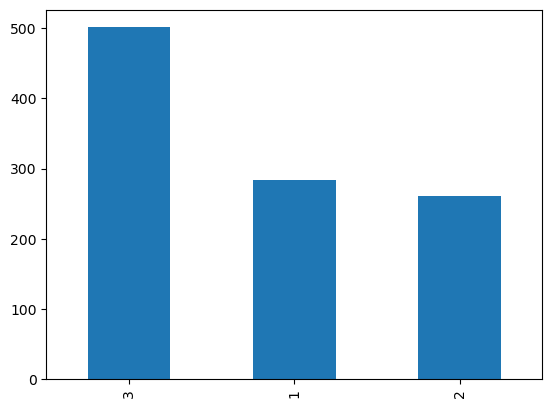

In [12]:
data['pclass'].value_counts().plot.bar()

Ainsi, nous obtenons un graphique $matplotlib$ basé sur nos résultats, car pandas fonctionne en collaboration avec matplotlib. Cela nous donne accès à toute une gamme de graphiques.
![image.png](./images/Python_Pandas_Fig_000006.png)

Nous pouvons utiliser $.plot$, $.scatter$, $.bar$, réaliser des histogrammes, etc. 

Par exemple, il serait très intéressant d'observer la répartition des âges via un histogramme.

<Axes: >

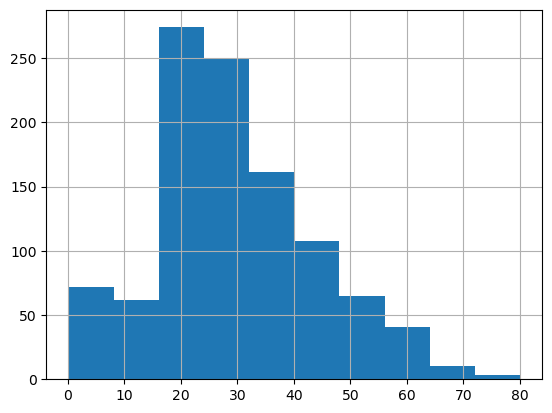

In [13]:
data['age'].hist()

On pourrait ainsi voir le nombre de personnes ayant entre 20 et 30 ans. On constate qu'ils étaient assez nombreux, dépassant les 250. Il est également notable qu'il y avait un grand nombre de passagers mineurs, certainement plus que le nombre de passagers âgés de plus de 50 ans.

## 8. Groupby : équivalent des pivot tables d'Excel dans Pandas

Pour finir notre analyse, je vais vous présenter une fonction extrêmement utile : la fonction $groupby$. Par exemple, nous allons pouvoir analyser les données en regroupant les individus selon leur sexe. 

Pour cela, nous écrivons $groupby('sexe')$. 

Une fois regroupés, il nous faut produire une statistique. Que ce soit une moyenne ou un écart-type, pour cet exemple, je vais choisir la moyenne.

In [14]:
data.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


Ainsi, nous constatons que les femmes avaient en moyenne 28 ans et les hommes 30 ans. De plus, 75 % des femmes ont survécu au naufrage, tandis que seulement 20 % des hommes ont survécu à cette catastrophe.

Maintenant, nous pouvons mener une analyse encore plus poussée en regroupant les individus non seulement par sexe, mais aussi selon la classe dans laquelle ils voyageaient. 

In [15]:
data.groupby(['sex', 'pclass']).mean()  

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

Les résultats montrent que 96 % des femmes voyageant en première classe ont survécu, tandis que seulement 16 % des hommes en troisième classe ont survécu.

Il est important de noter que pour des fonctions qui modifient un dataframe, comme drop ou dropna, il existe un paramètre $inplace$ qui permet d'appliquer les modifications directement sur le dataframe sans avoir à le réassigner.
![image.png](./images/Python_Pandas_Fig_000007.png)


## 9. DataFrame et Séries

Dans Pandas, il existe deux structures de données : le DataFrame et la Série. Pour faire simple, une Série, c'est juste une colonne dans un DataFrame. Donc, lorsqu'on assemble plusieurs séries côte à côte, cela nous donne un DataFrame.
![image.png](./images/Python_Pandas_Fig_000008.png)

Mais qu'est-ce qu'une Série exactement ? En réalité, c'est un tableau $Numpy$ à une dimension, auquel on a ajouté une colonne d'index. 
- à droite, on a notre tableau Numpy contenant nos différentes valeurs et 
- à gauche, on a une colonne d'index. 
![image.png](./images/Python_Pandas_Fig_000009.png)

C'est pour cette raison que, si on imprime notre colonne "âge" à l'écran, on obtient deux colonnes : 

In [16]:
data['age']

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1301    45.5000
1304    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1046, dtype: float64

Il ne faut pas confondre cette colonne d'index avec l'index du tableau $Numpy$. C'est légèrement différent. Dans cette colonne d'index, nous pouvons choisir notre propre index. 

Par exemple, on peut décider d'indexer notre tableau avec les noms des passagers à bord du Titanic. Pour cela, on écrit $data = data.set_index('nom')$, ce qui remplace les valeurs 0, 1, 2, 3, etc., par les noms des passagers du Titanic.

In [17]:
data = pd.read_excel('datasets/titanic3.xls')
data = data.set_index('name')
data['age']

name
Allen, Miss. Elisabeth Walton                      29.0000
Allison, Master. Hudson Trevor                      0.9167
Allison, Miss. Helen Loraine                        2.0000
Allison, Mr. Hudson Joshua Creighton               30.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    25.0000
                                                    ...   
Zabour, Miss. Hileni                               14.5000
Zabour, Miss. Thamine                                  NaN
Zakarian, Mr. Mapriededer                          26.5000
Zakarian, Mr. Ortin                                27.0000
Zimmerman, Mr. Leo                                 29.0000
Name: age, Length: 1309, dtype: float64

Ce qu'il est important de retenir sur les séries, c'est qu'on peut les assembler ensemble, surtout si elles partagent un même index. 
![image.png](./images/Python_Pandas_Fig_000010.png)

Maintenant, considérez qu'un DataFrame est un peu comme un dictionnaire qui contient des séries. 
![image.png](./images/Python_Pandas_Fig_000011.png)

Et je n'invente rien, car c'est ce que Pandas dit lui-même sur son site officiel. Pour rappel, dans un dictionnaire, on a des associations entre des clés et des valeurs. Ici, nous aurons des associations entre des colonnes et des séries. 


## 10. Indexing et Slicing

La véritable nature d'un DataFrame et d'une Série va vous permettre de comprendre plus facilement les différentes opérations d'indexing et de slicing que l'on retrouve dans Pandas. 

En effet, vous verrez souvent ce genre de ligne écrite dans des codes sur Internet. 

In [18]:
data['age'][0:10]

name
Allen, Miss. Elisabeth Walton                      29.0000
Allison, Master. Hudson Trevor                      0.9167
Allison, Miss. Helen Loraine                        2.0000
Allison, Mr. Hudson Joshua Creighton               30.0000
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    25.0000
Anderson, Mr. Harry                                48.0000
Andrews, Miss. Kornelia Theodosia                  63.0000
Andrews, Mr. Thomas Jr                             39.0000
Appleton, Mrs. Edward Dale (Charlotte Lamson)      53.0000
Artagaveytia, Mr. Ramon                            71.0000
Name: age, dtype: float64

Si vous êtes perdus, rappelez-vous que ce que l'on trouve à gauche est une série, et ce que l'on trouve à droite est de l'indexing sur le tableau numpy de cette série. 

Si on exécute ce code, on obtient les dix premières valeurs de notre série "age".

Maintenant, parlons de "boolean indexing". Puisqu'on dispose d'un tableau numpy, on peut générer un masque. Par exemple, pour identifier tous les passagers mineurs, nous générerons un masque. Ce masque peut ensuite être injecté dans notre DataFrame, ce qui nous donnera un DataFrame dans lequel seuls les passagers mineurs sont sélectionnés. 

Une fois que nous avons sélectionné uniquement ces passagers mineurs, nous pourrions utiliser les fonctions $groupby$ ou $value_counts$. 

In [19]:
data[data['age'] < 18]['pclass'].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

Ainsi, parmi les passagers mineurs, on trouve 106 passagers en troisième classe, 33 en deuxième et 15 en première. 

En utilisant la fonction groupby pour regrouper tous les passagers mineurs selon leur genre et la classe dans laquelle ils voyageaient, on observe que 87% des femmes en première classe âgées de moins de 18 ans ont survécu, tandis que malheureusement seulement 23% des hommes de moins de 18 ans en troisième classe ont survécu.

In [20]:
data[data['age'] < 18].groupby(['sex', 'pclass']).mean(numeric_only=True)

survived        age     sibsp     parch        fare   body
sex    pclass                                                            
female 1       0.875000  14.125000  0.500000  0.875000  104.083337    NaN
       2       1.000000   8.273150  0.666667  1.166667   27.998844    NaN
       3       0.543478   8.416667  1.456522  1.043478   18.284148  328.0
male   1       0.857143   9.845243  0.571429  1.714286  129.752371    NaN
       2       0.733333   6.222220  0.600000  0.933333   31.750280    NaN
       3       0.233333   9.838888  1.966667  1.016667   21.677570   65.5

Ce que je souhaite mettre en avant est qu'avec Pandas, on écrit de nombreuses petites sections de code qui, prises individuellement, sont simples à comprendre. Cependant, lorsqu'elles sont combinées sur une seule ligne, elles peuvent sembler plus complexes, mais elles offrent des analyses très approfondies. 

## 11. Iloc et loc

Concernant le slicing et l'indexing, il est essentiel que je vous introduise aux fonctions $iloc$ et $loc$ que l'on retrouve fréquemment. 

- Avec $iloc$, on peut réaliser de l'indexing exactement comme avec $numpy$. En réalité, $iloc$ signifie "index location". Donc, si jusqu'à présent vous pensiez qu'un DataFrame était semblable à un tableau de $numpy$ et qu'on pouvait y faire de l'indexing directement,par exemple, $data[0,0]$, vous étiez dans l'erreur. Cependant, les développeurs de Pandas ont bien compris que les utilisateurs apprécient $numpy$ et son système d'indexing. C'est pourquoi ils ont créé la fonction $iloc$, permettant d'obtenir un résultat similaire à celui de l'indexing sur numpy, par exemple $data.iloc[0,0]$. Ainsi, avec $iloc$, on peut effectuer de l'indexing, par exemple $data.iloc[0:2,0:2]$, du slicing, et même intégrer la notion de pas, exactement comme avec numpy.

    - Pour conclure, il y a aussi la fonction $loc$ qui permet de réaliser des opérations similaires, mais en se basant sur les noms des colonnes. Par exemple, on pourrait écrire "0:2" suivi du nom d'une colonne, comme "age", $data.loc[0:2, 'age']$. Si l'on souhaite indiquer plusieurs colonnes, on crée simplement une liste de ces colonnes, les plaçant entre crochets, par exemple, $data.loc[0:2, ['age', 'sex']]$.

Vous êtes désormais familiarisé avec les différentes techniques de slicing et d'indexing disponibles dans un DataFrame. Un conseil à retenir serait d'éviter de mélanger ces différentes méthodes. Soyez toujours explicite lorsque vous effectuez de l'indexing dans un DataFrame. 

Par exemple, certains pourraient utiliser $iloc$ en ne précisant que les lignes, par exemple $data.iloc[0:2]$, ce qui impliquerait par défaut toutes les colonnes. Mais s'appuyer sur de tels sous-entendus n'est pas toujours judicieux. Je vous recommande d'être clair et d'indiquer explicitement lorsque vous souhaitez sélectionner toutes les colonnes, par exemple $data.iloc[0:2, :]$.

In [21]:
data = pd.read_excel('datasets/titanic3.xls')
data.iloc[0,0]

1

In [22]:
data.iloc[0:2,0:2]

,pclass,survived
0,1,1
1,1,1


In [23]:
data.loc[0:2, 'age']

0    29.0000
1     0.9167
2     2.0000
Name: age, dtype: float64

In [24]:
data.loc[0:2, ['age', 'sex']]

,age,sex
0,29.0000,female
1,0.9167,male
2,2.0000,female


## 12. Exercices

![image.png](./images/Python_Pandas_Fig_000012.png)

À présent, voici un petit exercice qui va vous permettre de vous entraîner sur Pandas. Votre mission est de modifier le contenu de la colonne "âge" pour créer quatre catégories d'âge :

- Une catégorie pour les gens de moins de 20 ans,
- Une catégorie pour les gens de 20 à 30 ans,
- Une catégorie pour les gens de 30 à 40 ans,
- Et une catégorie pour les gens de plus de 40 ans.

Ce genre d'opération est très courant en data science. C'est ce qu'on appelle du "feature engineering" et cela va nous permettre de faire des analyses qui ont un peu plus de sens.

Une solution simple est de faire du "boolean indexing" pour sélectionner, par exemple, tous les gens qui ont moins de 20 ans et de modifier l'âge de ces personnes en indiquant qu'il est égal à zéro. Ensuite, on fait la même chose pour les gens qui ont plus de 20 ans et moins de 30 ans en précisant que leur âge est égal à 1 et ainsi de suite...

Ceci a pour effet de modifier notre dataset : dorénavant on va trouver seulement les valeurs 0, 1, 2, et 3, ce qui est parfois beaucoup plus pratique pour faire des statistiques avec "value_counts" et "groupby". 

Typiquement, on pourra voir qu'il y avait trois cent soixante-et-une personnes dans la catégorie 1, c'est-à-dire des gens qui ont entre 20 et 30 ans. Et parmi ces gens-là de la catégorie 1, on peut observer qu'il y a 37% de survivants.

In [25]:
data = pd.read_excel('datasets/titanic3.xls')
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

data.loc[data['age'] <= 20, 'age'] = 0 
data.loc[(data['age'] > 20) & (data['age'] <=30), 'age'] = 1 
data.loc[(data['age'] > 30) & (data['age'] <=40), 'age'] = 2
data.loc[data['age'] > 40, 'age'] = 3 

In [26]:
data.head()

,pclass,survived,sex,age
0,1,1,female,1.0
1,1,1,male,0.0
2,1,0,female,0.0
3,1,0,male,1.0
4,1,0,female,1.0


In [27]:
data['age'].value_counts()

1.0    361
0.0    248
3.0    227
2.0    210
Name: age, dtype: int64

In [28]:
data.groupby(['age']).mean(numeric_only=True)

,pclass,survived
age,,
0.0,2.568548,0.459677
1.0,2.371191,0.371191
2.0,2.109524,0.423810
3.0,1.643172,0.396476


### 12.1 map() + apply() + replace() + cat.codes

Une autre façon de répondre à cette question en utilisant la fonction $map$. Cette fonction est extrêmement puissante. Elle permet d'appliquer une autre fonction sur chaque élément d'une colonne. 
![image.png](./images/Python_Pandas_Fig_000013.png)

Par exemple, avec notre nouvelle colonne "âge", on pourrait vouloir ajouter 1. Dans ce cas, on va créer une fonction, $x = x + 1$, à l'intérieur de $map$, et pour cela, on peut simplement utiliser la commande $lambda : x: x + 1$. 

In [29]:
data['age'].map(lambda x:x+1)

0       2.0
1       1.0
2       1.0
3       2.0
4       2.0
       ... 
1304    1.0
1305    NaN
1306    2.0
1307    2.0
1308    2.0
Name: age, Length: 1309, dtype: float64

Ceci nous donne pour résultat 2, 1, 2. C'est donc là où cette fonction $map$ va devenir très utile. 

Si on définit une fonction "catégorie âge" qui retourne différentes catégories selon la valeur de l'âge entrée dans la fonction, on peut appliquer cette fonction en la passant dans notre fonction $map$, ce qui nous donne le résultat suivant. 

In [30]:
def category_ages(age):
    if age <= 20:
        return '<20 ans'
    elif (age > 20) & (age <= 30):
        return '20-30 ans'
    elif (age > 30) & (age <= 40):
        return '30-40 ans'
    else:
        return '+40 ans'

In [31]:
data['age'].map(category_ages)

0       <20 ans
1       <20 ans
2       <20 ans
3       <20 ans
4       <20 ans
         ...   
1304    <20 ans
1305    +40 ans
1306    <20 ans
1307    <20 ans
1308    <20 ans
Name: age, Length: 1309, dtype: object

Une des forces de cette fonction est qu'on peut obtenir des résultats qu'on ne pourrait pas atteindre avec la méthode que nous avons vue précédemment. La fonction $map$ permet de traiter tous les éléments de la colonne "âge" les uns après les autres, alors qu'avec du $boolean\ indexing$ sur plusieurs lignes, on traite tous les éléments d'une colonne en même temps. 

Si dans notre première ligne on crée une chaîne de caractères, notre code va générer une erreur, car à la ligne suivante il existe des chaînes de caractères à l'intérieur de notre colonne "âge" et on ne peut pas les comparer à des nombres entiers. 

La fonction $map$ est donc extrêmement utile et souvent utilisée pour des opérations plus avancées. 

Notez au passage qu'il existe la fonction $apply$ qui permet d'appliquer une fonction sur chaque élément d'un DataFrame, c'est un peu comme la fonction $map$ étendue à tout le DataFrame.

## 13. Comment transformer des catégories en données numériques. 

![image.png](./images/Python_Pandas_Fig_000014.png)

Actuellement, dans notre dataset du Titanic, nous avons une colonne "genre" remplie des mots "hommes" et "femmes". Avec des mots, il est difficile de faire des calculs. Nous avons besoin de nombres pour faire du machine learning et des statistiques. 

![image.png](./images/Python_Pandas_Fig_000015.png)

Pour convertir des catégories en données numériques, je vais vous montrer trois méthodes : 
- une méthode avec la fonction $map$, 
- une méthode avec $replace$, et 
- une méthode avec $cat.codes$. 

Avec la fonction $map$, on doit simplement entrer une fonction qui permet d'associer la catégorie "homme" au nombre 0 et la catégorie "femme" au nombre 1. 

Pour cela, on utilise des accolades pour démarrer un dictionnaire associatif, en écrivant que "male" est associé à 0 et "female" est associé à 1, ce qui nous donne le résultat attendu. 

In [32]:
data = pd.read_excel('datasets/titanic3.xls')
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

data['sex'].map({'male':0, 'female':1})

0       1
1       0
2       1
3       0
4       1
       ..
1304    1
1305    1
1306    0
1307    0
1308    0
Name: sex, Length: 1309, dtype: int64

La deuxième méthode, qui est plus explicite, est la méthode $replace$ : on utilise deux listes et on remplace les éléments de la première liste par les éléments de la deuxième. C'est très simple à comprendre. On écrit "male" et "female" dans notre première liste, et on les remplace par 0 et 1, ce qui nous donne encore une fois le résultat attendu. 

In [33]:
data['sex'].replace({'male':0, 'female':1})

0       1
1       0
2       1
3       0
4       1
       ..
1304    1
1305    1
1306    0
1307    0
1308    0
Name: sex, Length: 1309, dtype: int64

Enfin, ma technique préférée est d'utiliser $cat.codes$. Actuellement, les valeurs de notre colonne sont de type "object". 

In [34]:
data['sex']

0       female
1         male
2       female
3         male
4       female
         ...  
1304    female
1305    female
1306      male
1307      male
1308      male
Name: sex, Length: 1309, dtype: object

Mais dans pandas, il existe un type très intéressant qui est le type "category". Ce type est pratique car pandas va lui-même compter le nombre de fois que certaines catégories apparaissent et les considérer comme telles dans notre colonne. 

In [35]:
data['sex'].astype('category')

0       female
1         male
2       female
3         male
4       female
         ...  
1304    female
1305    female
1306      male
1307      male
1308      male
Name: sex, Length: 1309, dtype: category
Categories (2, object): ['female', 'male']

Une fois qu'on a des catégories, on peut utiliser $cat.codes$ pour convertir ces catégories en valeurs numériques. Cette technique est particulièrement utile quand on a de nombreux types de catégories différentes. 

Par exemple, si on a un dataset sur la sécurité routière qui contient de nombreuses catégories de véhicules : motos, voitures, camions, camionnettes, remorques, etc. Avec les fonctions $map$ et $replace$, il faudrait explicitement préciser par quoi remplacer toutes ces catégories, alors qu'avec $cat.codes$, une simple ligne suffit.

In [36]:
data['sex'].astype('category').cat.codes

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Length: 1309, dtype: int8